# Solución general de una ecuación de Laplace con condiciones de Dirichlet


In [7]:
import sympy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from sympy.abc import x, y, z,w,m
from sympy import init_printing
init_printing(use_latex="mathjax")

In [2]:
#Estas son las condiciones de frontera

a = 50
b = 50
d_bw_points=1

#Frontera Inferior
def f1(x):
    fInf = x
    return fInf

#Frontera Superior
def f2(x):
    fSup = 100
    return fSup

#Frontera izquierda
def g1(y):
    gLeft = 0
    return gLeft

#Frontera derecha
def g2(y):
    gRight = 0
    return gRight


[[ 0.          0.9949986   1.98998732 ... 45.32552466 45.50030117
  44.14283344]
 [ 0.          1.01187506  2.02350941 ... 36.91623934 33.34546496
  24.04968374]
 [ 0.          1.02400954  2.0475372  ... 28.60503091 23.21507038
  13.8660708 ]
 ...
 [ 0.         20.38252249 37.23148884 ... 49.71304445 37.2429451
  20.38829669]
 [ 0.         29.44931799 49.86491731 ... 62.37443544 49.87245454
  29.4531169 ]
 [ 0.         49.95804249 70.40849027 ... 79.4148756  70.412229
  49.95992688]]


(-2.0, 110.0)

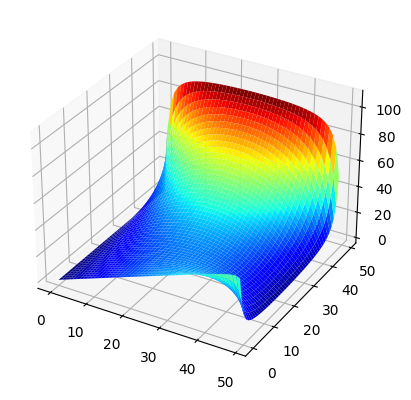

In [8]:
pi = float(sympy.pi)



N = 100
x = np.arange(0,a,d_bw_points)
y = np.arange(0,b,d_bw_points)
X,Y = np.meshgrid(x,y)


def A(n,a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f1(x)*sympy.sin(n*pi*x/a)),(x,0,a))
    A_n = 2*integra/(a*sympy.sinh(n*pi*b/a))
    return float(A_n)

def B(n,a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f2(x)*sympy.sin(n*pi*x/a)),(x,0,a))
    B_n = 2*integra/(a*sympy.sinh(n*pi*b/a))
    return float(B_n)

def C(n,a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g1(y)*sympy.sin(n*pi*y/b)),(y,0,b))
    C_n = 2*integra/(b*sympy.sinh(n*pi*a/b))
    return float(C_n)

def D(n,a,b):
    y = sympy.Symbol("y")
    integra = sympy.integrate((g2(y)*sympy.sin(n*pi*y/b)),(y,0,b))
    D_n = 2*integra/(b*sympy.sinh(n*pi*a/b))
    return float(D_n)

def u(x,y):
    suma=0
    for n in range(1,N):
        sumaA = A(n,a,b)*np.sin(n*pi/a*x)*np.sinh(n*pi/a*(b-y))
        sumaB = B(n,a,b)*np.sin(n*pi/a*x)*np.sinh(n*pi/a*y)
        sumaC = C(n,a,b)*np.sinh(n*pi/b*(a-x))*np.sin(n*pi/b*y)
        sumaD = D(n,a,b)*np.sinh(n*pi/b*x)*np.sin(n*pi/b*y)
        suma += sumaA + sumaB + sumaC + sumaD
    return suma


#for i in range(0,len(x)):
#    for j in range(0,len(y)):
#        u(X,Y)
print(u(X,Y))     

#print(float(u(0.5,1)))
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

g=u(X,Y)
ax.plot_surface(X, Y, g,cmap="jet")
ax.set_zlim(-2, 110)



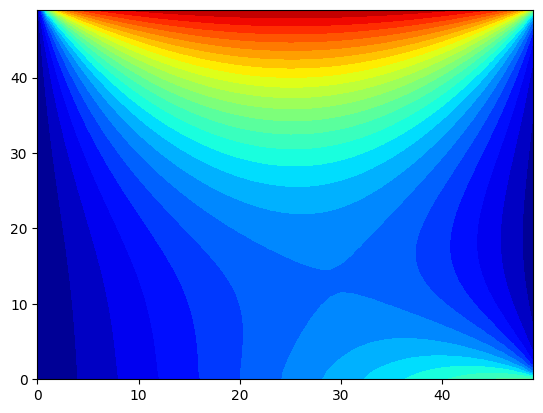

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)


g= u(X,Y) 

cont=ax.contourf(X, Y, g,30,cmap="jet")
cont.set_clim(vmin=0, vmax=100)
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

In [12]:
#Bloc para expresiones
pi=sympy.pi

def B(a,b):
    x = sympy.Symbol("x")
    integra = sympy.integrate((f2(x)*sympy.sin(m*pi*x/a)),(x,0,a))
    B_m = 2*integra/(a*sympy.sinh(m*pi*b/a))
    print(B_m)
    return B_m
B(a,b)

Piecewise((-5000*cos(pi*m)/(pi*m) + 5000/(pi*m), (m > -oo) & (m < oo) & Ne(m, 0)), (0, True))/(25*sinh(pi*m))


⎧  5000⋅cos(π⋅m)   5000                            
⎪- ───────────── + ────  for m > -∞ ∧ m < ∞ ∧ m ≠ 0
⎨       π⋅m        π⋅m                             
⎪                                                  
⎩          0                     otherwise         
───────────────────────────────────────────────────
                    25⋅sinh(π⋅m)                   